Problem  Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.


Business Goal

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:/Users/sairam/Downloads/CarPrice_Assignment.csv")

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
df=df.drop('car_ID',axis=1)
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
df=df.drop('CarName',axis=1)

In [8]:
df_new=pd.get_dummies(df,drop_first=True)

In [9]:
df_new.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scale=StandardScaler()
new_df=scale.fit_transform(df_new)

In [12]:
df_new=pd.DataFrame(new_df,columns=df_new.columns)

In [13]:
df_new.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014
1,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014
2,0.133509,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014
3,0.938490,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014
4,0.938490,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014


In [18]:
x=df_new.loc[:,df_new.columns!='price']
y=df_new['price']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=18)

In [21]:
from sklearn import tree

In [22]:
rg_tree=tree.DecisionTreeRegressor(max_depth=3)

In [23]:
rg_tree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [24]:
train_pred=rg_tree.predict(x_train)
test_pred=rg_tree.predict(x_test)

In [25]:
train_pred

array([-0.749534  , -0.749534  , -0.749534  ,  0.92269701, -0.749534  ,
        3.20515185, -0.3121464 , -0.3121464 , -0.3121464 , -0.3121464 ,
       -0.749534  , -0.3121464 , -0.749534  , -0.749534  , -0.749534  ,
       -0.749534  , -0.3121464 ,  0.34964479,  0.34964479,  0.34964479,
       -0.749534  , -0.3121464 , -0.3121464 , -0.3121464 , -0.3121464 ,
        2.28670522, -0.749534  , -0.749534  , -0.3121464 , -0.3121464 ,
        0.34964479, -0.3121464 , -0.3121464 ,  0.34964479, -0.3121464 ,
       -0.3121464 , -0.749534  , -0.3121464 , -0.749534  , -0.749534  ,
       -0.749534  ,  0.34964479, -0.749534  ,  0.34964479, -0.749534  ,
       -0.3121464 ,  0.34964479,  3.20515185, -0.749534  , -0.749534  ,
        0.34964479, -0.3121464 ,  0.34964479,  0.34964479, -0.3121464 ,
       -0.749534  ,  0.34964479,  0.92269701, -0.3121464 , -0.3121464 ,
       -0.749534  , -0.749534  , -0.749534  , -0.3121464 , -0.3121464 ,
        2.58067549,  0.34964479, -0.3121464 , -0.749534  , -0.74

In [26]:
test_pred

array([ 0.34964479, -0.749534  ,  0.34964479, -0.3121464 , -0.3121464 ,
       -0.749534  ,  3.20515185,  0.34964479,  3.20515185,  2.58067549,
       -0.3121464 , -0.749534  ,  0.34964479,  0.92269701, -0.749534  ,
       -0.749534  ,  3.20515185,  0.34964479,  0.34964479, -0.749534  ,
       -0.749534  , -0.3121464 ,  0.34964479,  1.76283313,  0.34964479,
       -0.3121464 ,  0.34964479, -0.749534  , -0.749534  ,  3.20515185,
        0.34964479, -0.749534  ,  0.34964479, -0.749534  , -0.3121464 ,
        0.34964479, -0.749534  , -0.3121464 ,  0.92269701, -0.749534  ,
        0.34964479])

In [27]:
import pydotplus

In [28]:
dot_file=tree.export_graphviz(rg_tree,feature_names=x_train.columns)

In [29]:
graph=pydotplus.graph_from_dot_data(dot_file)

In [30]:
from IPython.display import Image

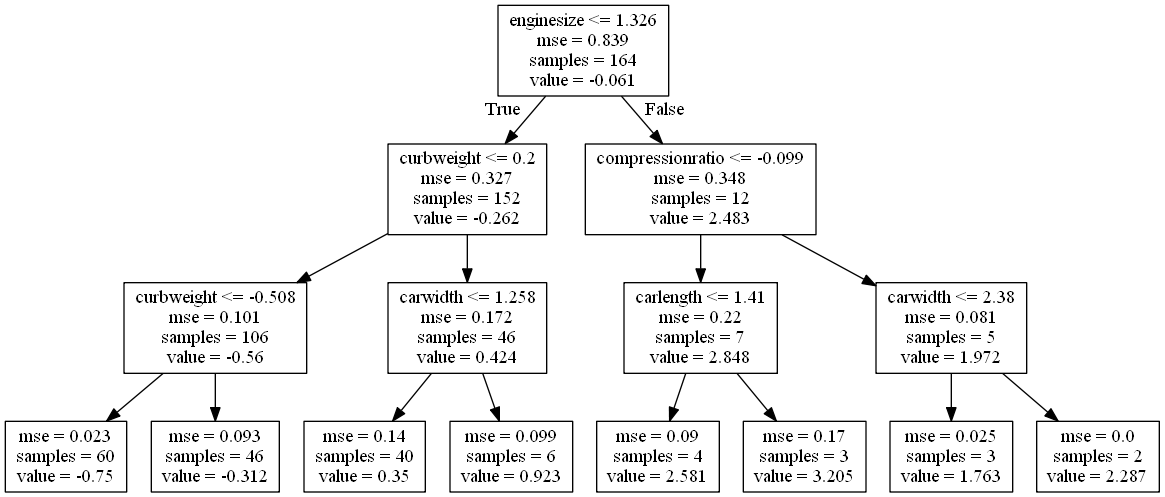

In [32]:
Image(graph.create_png())

In [33]:
from sklearn.metrics import mean_squared_error,r2_score

In [34]:
mse_train=mean_squared_error(y_train,train_pred)
r2_train=r2_score(y_train,train_pred)

In [36]:
print(mse_train)
print(r2_train)

0.07827397695420661
0.906744810623993


In [38]:
mse_test=mean_squared_error(y_test,test_pred)
r2_test=r2_score(y_test,test_pred)

In [39]:
print(mse_test)
print(r2_test)

0.13571169866441138
0.9134546655769562


we will now check whether the r2_score can be improved by tuning the parameters

In [40]:
rg_tree_imp=tree.DecisionTreeRegressor(max_depth=3,min_samples_split=50)

In [41]:
rg_tree_imp.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3, min_samples_split=50)

In [42]:
train_pred_imp=rg_tree_imp.predict(x_train)
test_pred_imp=rg_tree_imp.predict(x_test)

In [43]:
dot_file_imp=tree.export_graphviz(rg_tree_imp,feature_names=x_train.columns)

In [44]:
graph_imp=pydotplus.graph_from_dot_data(dot_file_imp)

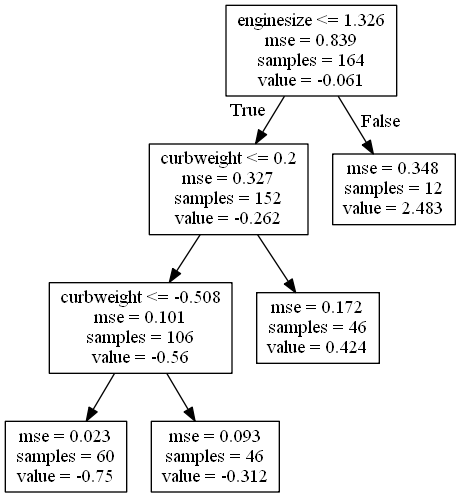

In [46]:
Image(graph_imp.create_png())

In [47]:
r2_train_imp=r2_score(y_train,train_pred_imp)
r2_test_imp=r2_score(y_test,test_pred_imp)

In [48]:
print(r2_train_imp)
print(r2_test_imp)

0.8707923888462269
0.9041199699011317


The r2_score is not improved by tuning the parameters so we will check now if we can increase the score by using RandomForestRegessor

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
random=RandomForestRegressor(n_estimators=10)

In [52]:
random.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10)

In [53]:
pred_train=random.predict(x_train)
pred_test=random.predict(x_test)

In [55]:
mse_train_rand=mean_squared_error(y_train,pred_train)
r2score_rand=r2_score(y_train,pred_train)

In [57]:
print(mse_train_rand)
print(r2score_rand)

0.01990762956791373
0.976282158673638


In [58]:
mse_test_rand=mean_squared_error(y_test,pred_test)
r2score_test_rand=r2_score(y_test,pred_test)

In [59]:
print(mse_test_rand)
print(r2score_test_rand)

0.1311953860688925
0.9163347841502616


We can see there is an increase of r2_score in training data but in testing data it remains the same by using RandomForestRegressor

we will now check th ebest parameters by using GridSearchCV

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
random_forest=RandomForestRegressor(n_estimators=100)

In [70]:
param_grid={'n_estimators':[200,250,300],'min_samples_split':[3,6,7,9],'max_features':[5,6,7,9]}

In [72]:
searchcv=GridSearchCV(random_forest,param_grid,cv=5,scoring='r2')

In [73]:
searchcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [5, 6, 7, 9],
                         'min_samples_split': [3, 6, 7, 9],
                         'n_estimators': [200, 250, 300]},
             scoring='r2')

In [74]:
searchcv.best_params_

{'max_features': 7, 'min_samples_split': 3, 'n_estimators': 250}

In [75]:
searchcv.best_estimator_

RandomForestRegressor(max_features=7, min_samples_split=3, n_estimators=250)

In [76]:
final_model=searchcv.best_estimator_

In [77]:
r2_score(y_train,final_model.predict(x_train))

0.9825602207539316

In [78]:
r2_score(y_test,final_model.predict(x_test))

0.948353251707733

Here by using GridSearchCV we can see there is an increase in r2_score in both training data and testing data